In [1]:
from utils import *
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Segoe UI Symbol','simHei','Arial','sans-serif']

## Load Data

In [2]:
years = [2016,2017]
resampling_period = '60T'

data = load_resample_data(years, resampling_period)
windfarms_names = data.columns.tolist()    

year:2016	(105408, 20)
year:2017	(105120, 20)
resampled to  (17544, 20)


## Clustering (optional)

In [4]:
clusters = [[d] for d in range(0,20)] # clusters = [[1,3],[7,4]]

a = {}
for c in clusters:
    a[c[0]] = (data.iloc[:,c]).mean(axis=1)

clustered_data = pd.DataFrame.from_dict(a)
clustered_data.columns = ['Cls {:d}'.format(d) for d in range(1,len(clusters)+1)] 

n_clusters = len(clusters)
# data = clustered_data

### Normalize data (optional)

In [5]:
# normalized_data = normalize_data(data)

### Convert original numerical data into categorical representation

In [6]:
## Set initial variables
alphabet_size=5
alphabets = list(string.ascii_uppercase[:alphabet_size]) # ['A', 'B', 'C', 'D', 'E' , ...]
alphabets = [ "○" , '◔', '◑', '◕', "●"] #  "○" , '◔', '◑', '◕', "●"  OR '▁ ','▃ ', '▄ ', '▆ ', '█ '

In [7]:
categorical_reps_df = categorical_rep_mycode_df(data.iloc[:,-20:],data.columns, alphabet_size, alphabets)
categorical_reps_df.head(3)

,AKE1,ARD1,BSR1,BTR1,BUL1,BUL2,CR1,CRE3,CRR1,GWW1,HAL1,IEW1,IEW2,KHW1,NEP1,OWF1,SCR2,SCR3,SCR4,TAB1
DT,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,●,●,○,◕,◕,●,●,◕,◕,●,●,◑,◔,●,●,●,●,●,●,◑
2016-01-01 01:00:00,◕,◕,◔,◑,◕,●,●,◕,◕,●,●,◑,◔,●,●,●,●,●,●,◑
2016-01-01 02:00:00,●,◕,◔,◑,◕,●,●,◕,◑,◕,●,◑,◔,●,●,●,●,●,●,◕


## Find most frequent motifs of a single series (one single windfarm/ one cluster)

### Define Motifs

In [8]:
lenght_time_period = 6

# Define to what motifs are we interested ! :)
candidate_motifs = [''.join(p) for p in product(alphabets,repeat=lenght_time_period)] # Generate all permutations of alphabets
print("Number of desired motifs =", len(candidate_motifs))

Number of desired motifs = 15625


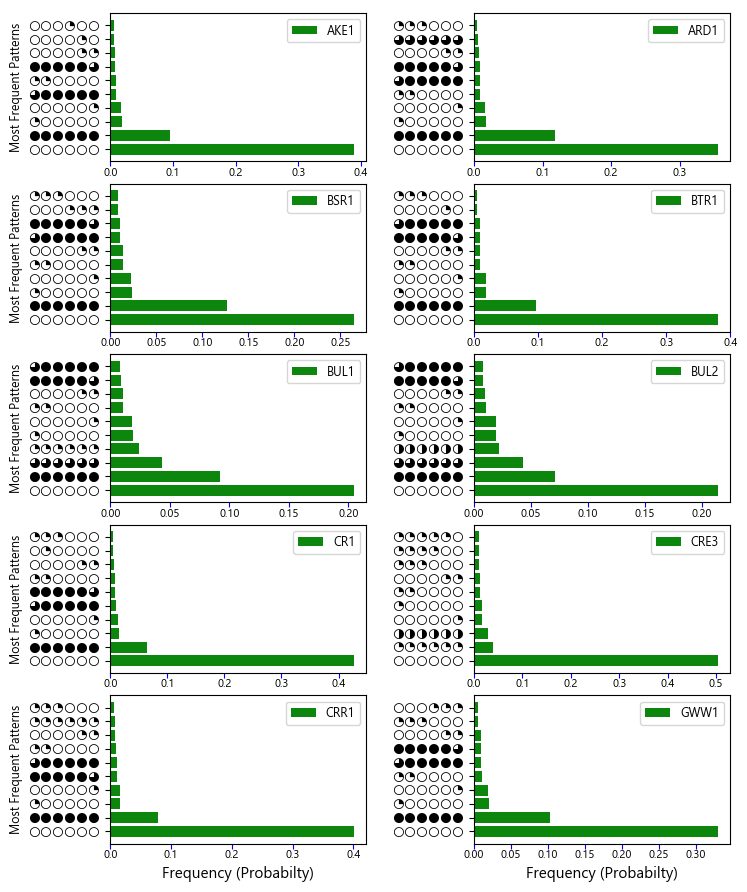

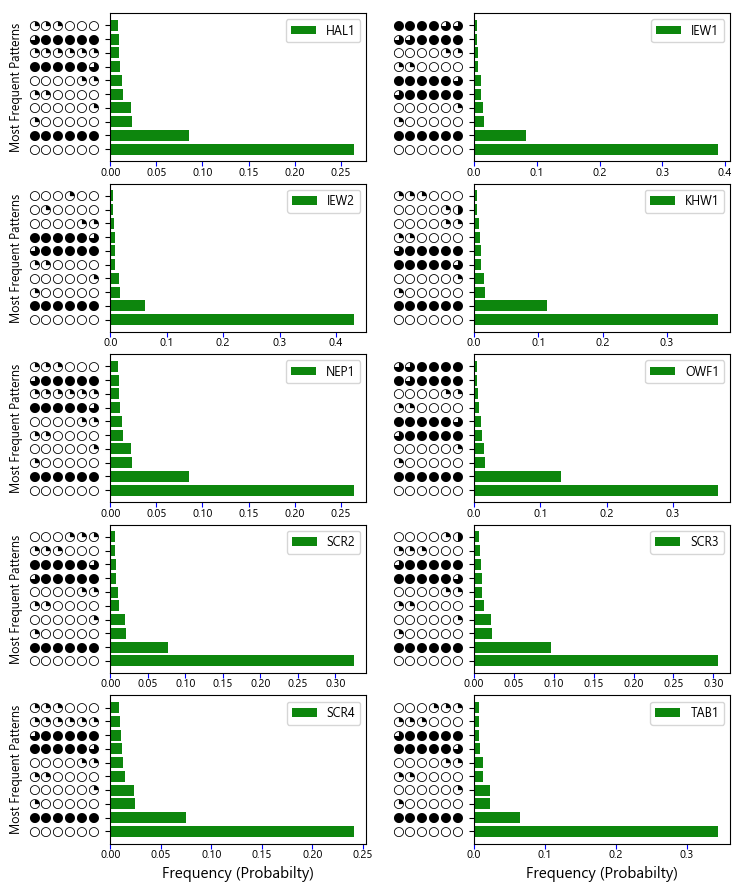

In [10]:
data_here = categorical_reps_df 
total_plots = 20
n_rows = 5 ; figsize_r = 11
n_cols = 2 ; figsize_c = 8
n_plots = n_rows * n_cols
method = 're_findall' #re_findall  OR count
Title = 'Most frequent patterns in {} consecutive hours '.format(lenght_time_period)

for p in range(int(-(-total_plots//n_plots))):
    fig, axar = plt.subplots(n_rows, n_cols,figsize=(figsize_c,figsize_r), dpi=100)
    fig.subplots_adjust(hspace=0.15, wspace=0.07*lenght_time_period)        

    ind = 0
    for i in range(n_plots*p,min(n_plots*(p+1),total_plots)):
        r = ind // n_cols
        c = ind % n_cols

        one_time_series = data_here.iloc[:,i].str.cat(sep='')
        motifs_freqs = find_most_freq_motifs2(one_time_series, candidate_motifs, 10, method)
        legend = data_here.columns[i]
        freqs = [x[1] for x in motifs_freqs]
        motifs = [x[0] for x in motifs_freqs]
        values= np.array(freqs)/(data.shape[0])
        ax = axar[r, c]    
        ax.barh(range(len(freqs)), values, color='g', alpha=0.95)
        ax.legend([legend],loc='best', fontsize = 9)
        ax.set_yticks(range(len(motifs)))
        ax.set_yticklabels(motifs) # fontname='Arial'
        ax.tick_params(axis='x', labelsize = 8, which='major', pad=0, color = 'b')

        if c == 0:
            ax.set_ylabel('Most Frequent Patterns',fontsize=9)
        if r == n_rows-1:
            ax.set_xlabel('Frequency (Probabilty)',fontsize=11)

        # Pad margins so that markers don't get clipped by the axes
        ax.margins(0.05)
        
        ind = ind + 1

    fig.savefig(Title+str(p)+'.pdf', papertype='letter', dpi = 300, bbox_inches='tight')    